In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
csv = pd.read_csv('Resources/Project1_dataset.csv')

csv.head()

,year,state,state_abbrev,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house data
0,1997,Alabama,AL,143646,71.3,5.0,4320,49983,191.43
1,1998,Alabama,AL,148596,72.9,4.4,4351,55997,201.27
2,1999,Alabama,AL,154094,74.8,4.7,4370,54806,206.43
3,2000,Alabama,AL,156560,73.2,4.6,4452,49989,211.62
4,2001,Alabama,AL,156404,73.2,5.1,4468,51798,223.33


In [21]:
# Minor Data Munging to Re-Format the Data Frames
gdp_pivot = csv.pivot(index='year', columns='state', values='GDP')

# Preview that Reformatting worked
gdp_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,143646,42262,168551,82756,1378654,184193,190791,45231,560888,328995,...,24976,210844,872763,57700,15415,217252,193898,38840,153241,14724
1998,148596,41157,183138,84795,1470393,201076,196248,49743,590135,352713,...,26452,223769,928374,62291,16073,233096,210205,40086,162523,14928
1999,154094,40722,198096,89317,1582377,216300,202230,53862,616625,377608,...,27501,230418,965677,66023,17159,249798,230555,41831,172258,15711
2000,156560,39517,207793,90206,1709939,232752,216370,56109,642693,393195,...,29407,233153,998297,70292,18312,266886,237832,42607,180539,17205
2001,156404,40974,212656,89923,1702776,236383,220287,58882,658640,396875,...,29746,232723,1021889,73226,19274,284002,239426,43978,187939,18661


slope: -0.000007    intercept: 70.715222
R-squared: 0.221190


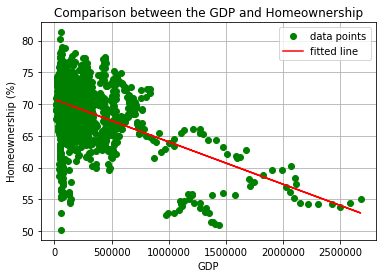

In [22]:
# Creating a plot to try to prove the hypothesis

gdp_x=csv["GDP"]
home_y= csv["homeownership(%)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp_x,home_y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(gdp_x, home_y, 'o',color="green", label='data points')
plt.plot(gdp_x, intercept + slope*gdp_x, 'r', label='fitted line')

plt.xlabel('GDP')
plt.ylabel('Homeownership (%)')
plt.title('Comparison between the GDP and Homeownership')
plt.grid()
plt.legend()

plt.show()

In [51]:
#Gustavo
#creating data frame from original data and selecting desired columns into new df
gus_data=pd.DataFrame(csv)
avg_unemp_grouped= gus_data.groupby(['year', 'state','homeownership(%)', 'GDP','median income','avg house data','population(thousands)'])['unemployment_rate'].mean()
avg_unemp_df=pd.DataFrame(avg_unemp_grouped).reset_index()
avg_unemp_df.head()


,year,state,homeownership(%),GDP,median income,avg house data,population(thousands),unemployment_rate
0,1997,Alabama,71.3,143646,49983,191.43,4320,5.0
1,1997,Alaska,67.2,42262,77275,158.66,609,7.1
2,1997,Arizona,63.0,168551,40942,173.76,4552,4.6
3,1997,Arkansas,66.7,82756,51237,167.83,2524,5.2
4,1997,California,55.7,1378654,62120,206.98,32218,6.4


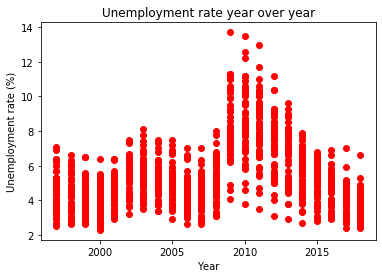

In [24]:
#creating scatter plot to show the yearly distribution of unemployment rate

x_axis=avg_unemp_df["year"]
y_axis=avg_unemp_df["unemployment_rate"]

plt.title("Unemployment rate year over year")
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")

plt.scatter(x_axis, y_axis, marker="o", color="red")

plt.show()

In [68]:
# zData Munging to Re-Format the Data Frames
unemployment_state =avg_unemp_df.pivot(index='year', columns='state', values='unemployment_rate')
homeownership_state =avg_unemp_df.pivot(index='year', columns='state', values='homeownership(%)')
pop_state =avg_unemp_df.pivot(index='year', columns='state', values='population(thousands)')
price_state = avg_unemp_df.pivot(index='year', columns='state', values='avg house data')
gdp_state = avg_unemp_df.pivot(index='year', columns='state', values='GDP')

 

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,5.0,7.1,4.6,5.2,6.4,3.5,5.0,4.0,4.8,4.6,...,2.9,5.3,5.3,3.2,3.9,3.8,4.9,6.9,3.6,4.8
1998,4.4,6.3,4.3,5.2,5.9,3.6,3.4,3.7,4.3,4.3,...,2.8,4.3,4.9,3.6,3.4,2.9,4.8,6.6,3.4,4.7
1999,4.7,6.5,4.4,4.6,5.2,3.1,2.9,3.4,3.9,3.9,...,2.7,4.0,4.7,3.5,3.0,2.7,4.9,6.5,3.1,4.6
2000,4.6,6.4,4.0,4.3,4.9,2.8,2.4,3.7,3.7,3.6,...,2.5,3.9,4.3,3.3,2.8,2.3,5.2,5.5,3.5,3.9
2001,5.1,6.4,4.8,5.0,5.4,3.8,3.1,3.5,4.7,4.0,...,3.1,4.6,5.0,4.4,3.3,3.2,6.3,5.0,4.5,3.8
2002,5.9,7.3,6.1,5.5,6.7,5.5,4.3,4.0,5.6,5.0,...,3.2,5.2,6.4,5.8,4.0,4.2,7.4,5.9,5.4,4.0
2003,6.0,7.8,5.7,5.9,6.8,6.0,5.4,4.3,5.2,4.8,...,3.5,5.6,6.7,5.6,4.3,4.1,7.4,6.0,5.7,4.3
2004,5.7,7.5,5.0,5.7,6.2,5.5,5.0,4.0,4.6,4.8,...,3.7,5.3,5.9,5.0,3.7,3.8,6.3,5.3,5.0,3.8
2005,4.5,6.9,4.7,5.2,5.4,5.0,4.9,4.1,3.7,5.3,...,3.8,5.6,5.4,4.1,3.5,3.6,5.6,5.1,4.7,3.6


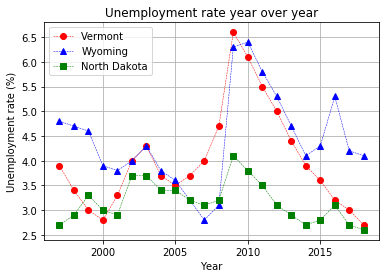

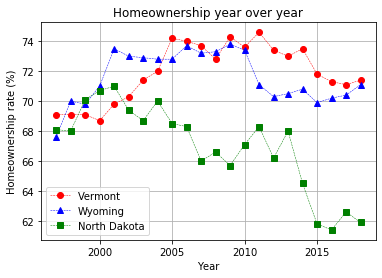

In [46]:
# Creating the plot for the yearly unemployments for 3 states with lower gdp
low_gdp_unemploy= ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_unemploy:
    unemp_plot = plt.plot(unemployment_state.index, unemployment_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.title('Unemployment rate year over year')
plt.grid()

plt.show()

#Creating the plot for the yearly Homeownership for 3 states with lower gdp
low_gdp_homeownership= ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_homeownership:
    home_plot = plt.plot(homeownership_state.index, homeownership_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='lower left')
plt.xlabel('Year')
plt.ylabel('Homeownership rate (%)')
plt.title('Homeownership year over year')
plt.grid()

plt.show()

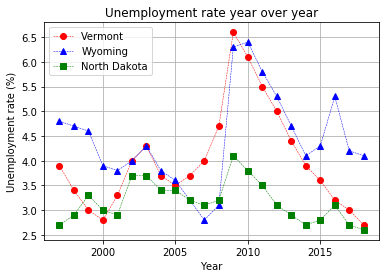

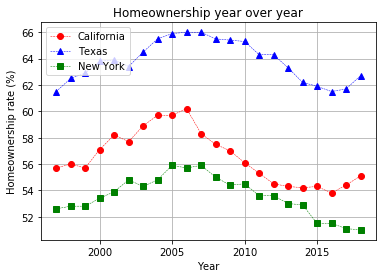

In [47]:
# Creating the plot for the yearly unemployments for 3 states with higher gdp
high_gdp_unemploy= ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in low_gdp_unemploy:
    unemp_plot = plt.plot(unemployment_state.index, unemployment_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.title('Unemployment rate year over year')
plt.grid()

plt.show()

#Creating the plot for the yearly Homeownership for 3 states with higher gdp
high_gdp_homeownership=['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_homeownership:
    home_plot = plt.plot(homeownership_state.index, homeownership_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Homeownership rate (%)')
plt.title('Homeownership year over year')
plt.grid()

plt.show()



slope: 0.017639    intercept: 732.248634
R-squared: 0.964867


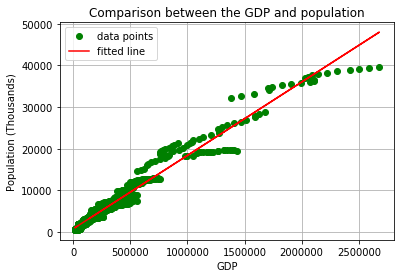

In [48]:
# Creating the plot for the biggest correlation 
gdp_x=csv["GDP"]
pop_y= csv["population(thousands)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp_x,pop_y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(gdp_x, pop_y, 'o',color="green", label='data points')
plt.plot(gdp_x, intercept + slope*gdp_x, 'r', label='fitted line')
plt.xlabel('GDP')
plt.ylabel('Population (Thousands)')
plt.title('Comparison between the GDP and population')
plt.grid()
plt.legend()

plt.show()


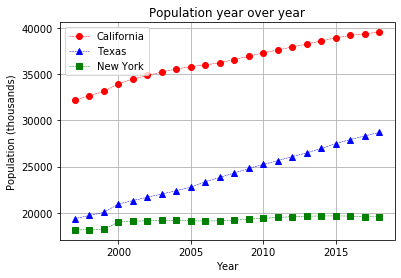

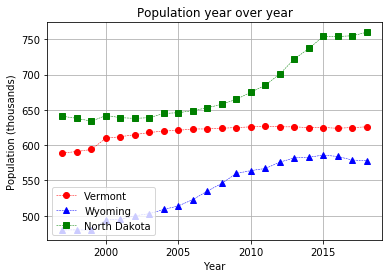

In [53]:
# Creating the plot for the yearly population for 3 states with higher gdp
high_gdp_pop= ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_pop:
    poph_plot = plt.plot(pop_state.index, pop_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.title('Population year over year')
plt.grid()

plt.show()

#Creating the plot for the yearly population for 3 states with lower gdp
low_gdp_pop= ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_homeownership:
    popl_plot = plt.plot(pop_state.index, pop_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='lower left')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.title('Population year over year')
plt.grid()

plt.show()


In [91]:
#creating columns to compose top 3 data frame
unemployment_state =avg_unemp_df.pivot(index='year', columns='state', values='unemployment_rate')
homeownership_state =avg_unemp_df.pivot(index='year', columns='state', values='homeownership(%)')
price_state = avg_unemp_df.pivot(index='year', columns='state', values='avg house data')
gdp_state = avg_unemp_df.pivot(index='year', columns='state', values='GDP')

ca_hw=homeownership_state["California"].mean()
tx_hw=homeownership_state["Texas"].mean()
ny_hw=homeownership_state["New York"].mean()
ca_hprice=price_state["California"].mean()
tx_hprice=price_state["Texas"].mean()
ny_hprice=price_state["New York"].mean()
ca_un=unemployment_state["California"].mean()
tx_un=unemployment_state["Texas"].mean()
ny_un=unemployment_state["New York"].mean()
ca_gdp=gdp_state["California"].mean()
tx_gdp=gdp_state["Texas"].mean()
ny_gdp=gdp_state["New York"].mean()
top_data = {'ca_hw':[ca_hw], 'tx_hw':[tx_hw], 'ny_hw':[ny_hw],
            'ca_hprice':[ca_hprice], 'tx_hprice':[tx_hprice], 'ny_hprice':[ny_hprice],
            'ca_un':[ca_un], 'tx_un':[tx_un], 'ny_un':[ny_un],
            'ca_gdp':[ca_gdp], 'tx_gdp':[tx_gdp], 'ny_gdp':[ny_gdp]}
top_df = pd.DataFrame(top_data)


#creating columns to compose bottom 3 data frame
ve_hw=homeownership_state["Vermont"].mean()
wy_hw=homeownership_state["Wyoming"].mean()
nd_hw=homeownership_state["North Dakota"].mean()
ve_hprice=price_state["Vermont"].mean()
wy_hprice=price_state["Wyoming"].mean()
nd_hprice=price_state["North Dakota"].mean()
ve_un=unemployment_state["Vermont"].mean()
wy_un=unemployment_state["Wyoming"].mean()
nd_un=unemployment_state["North Dakota"].mean()
ve_gdp=gdp_state["Vermont"].mean()
wy_gdp=gdp_state["Wyoming"].mean()
nd_gdp=gdp_state["North Dakota"].mean()
bottom_data = {'ve_hw':[ve_hw], 'wy_hw':[wy_hw], 'nd_hw':[nd_hw],
            've_hprice':[ve_hprice], 'wy_hprice':[wy_hprice], 'nd_hprice':[nd_hprice],
            've_un':[ve_un], 'wy_un':[wy_un], 'nd_un':[nd_un],
            've_gdp':[ve_gdp], 'wy_gdp':[wy_gdp], 'nd_gdp':[nd_gdp]}
bottom_df = pd.DataFrame(bottom_data)
bottom_df


,ve_hw,wy_hw,nd_hw,ve_hprice,wy_hprice,nd_hprice,ve_un,wy_un,nd_un,ve_gdp,wy_gdp,nd_gdp
0,71.918182,71.595455,66.95,384.758636,235.105909,245.110455,4.013636,4.413636,3.172727,24813.136364,30157.636364,36751.727273


In [11]:
#David
david_data = pd.read_csv('Resources/Project1_dataset.csv')
david_data = david_data.rename(columns={'avg house data': 'avg house price (thousands)'})
david_data.head()

,year,state,state_abbrev,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house price (thousands)
0,1997,Alabama,AL,143646,71.3,5.0,4320,49983,191.43
1,1998,Alabama,AL,148596,72.9,4.4,4351,55997,201.27
2,1999,Alabama,AL,154094,74.8,4.7,4370,54806,206.43
3,2000,Alabama,AL,156560,73.2,4.6,4452,49989,211.62
4,2001,Alabama,AL,156404,73.2,5.1,4468,51798,223.33


In [12]:
price_grouped = david_data.groupby(['year', 'GDP', 'state'])['avg house price (thousands)']
avg_price_mean = price_grouped.mean()

# Convert to DataFrame
housing_price = pd.DataFrame(avg_price_mean)
housing_price = housing_price.reset_index()

# Preview DataFrame
housing_price.head()

,year,GDP,state,avg house price (thousands)
0,1997,14724,Wyoming,138.11
1,1997,15415,Vermont,224.58
2,1997,22411,North Dakota,147.68
3,1997,24976,South Dakota,181.17
4,1997,29169,Montana,192.90


In [13]:
# Minor Data Munging to Re-Format the Data Frames
housing_price_pivot = housing_price.pivot(index='year', columns='state', values='avg house price (thousands)')

# Preview that Reformatting worked
housing_price_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,191.43,158.66,173.76,167.83,206.98,210.43,228.02,237.66,178.59,197.52,...,181.17,194.19,139.49,222.34,224.58,205.92,231.56,141.19,199.47,138.11
1998,201.27,163.53,182.92,174.01,224.31,222.96,239.44,245.40,187.44,209.54,...,188.76,204.42,146.17,233.72,229.94,212.50,247.15,147.90,207.21,142.94
1999,206.43,169.21,191.93,178.33,242.29,242.28,252.28,254.79,194.77,222.32,...,195.11,211.00,154.08,236.54,239.53,221.64,260.29,150.63,217.62,146.91
2000,211.62,172.12,203.57,182.52,272.69,270.57,271.82,269.40,207.98,235.72,...,202.82,216.76,163.50,238.90,257.29,236.80,273.85,153.13,230.92,153.17
2001,223.33,180.71,217.08,192.28,307.44,295.96,295.74,289.06,228.67,252.97,...,213.57,227.32,174.38,249.28,276.91,257.21,290.65,161.50,243.06,162.00


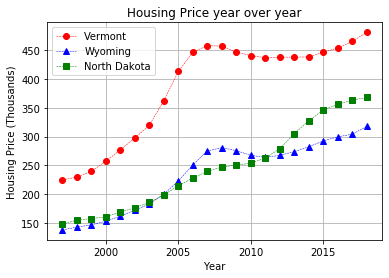

In [14]:
# Generate the Plot (Accounting for percentages)
low_gdp_states = ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_states:
    housing_price_plot = plt.plot(housing_price_pivot.index, housing_price_pivot[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Housing Price (Thousands)')
plt.title('Housing Price year over year')
plt.grid()

plt.show()

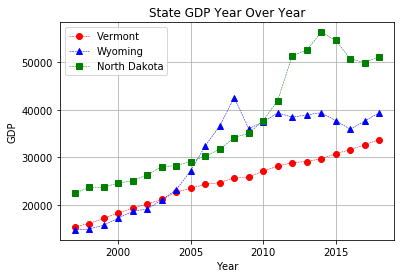

In [15]:
# Generate the Plot (Accounting for percentages)
low_gdp_states = ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_states:
    gdp_plot = plt.plot(gdp_pivot.index, gdp_pivot[state], marker= mark, color=color, ls='--', label=state, linewidth = 0.5)

#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('State GDP Year Over Year')
plt.grid()

plt.show()

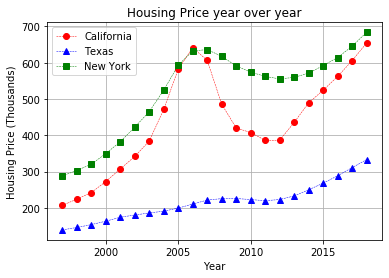

In [16]:
# Generate the Plot (Accounting for percentages)
high_gdp_states = ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_states:
    housing_price_plot = plt.plot(housing_price_pivot.index, housing_price_pivot[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Housing Price (Thousands)')
plt.title('Housing Price year over year')
plt.grid()

plt.show()

In [ ]:
# Generate the Plot (Accounting for percentages)
high_gdp_states = ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_states:
    gdp_plot = plt.plot(gdp_pivot.index, gdp_pivot[state], marker = mark, color=color, ls='--', label=state, linewidth = 0.5)

#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('State GDP Year Over Year')
plt.grid()

plt.show()

In [4]:
#Erik

In [5]:
#Jack
jack_data = pd.read_csv("Resources/Project1_dataset.csv")
jack_data.head()

,year,state,state_abbrev,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house data
0,1997,Alabama,AL,143646,71.3,5.0,4320,49983,191.43
1,1998,Alabama,AL,148596,72.9,4.4,4351,55997,201.27
2,1999,Alabama,AL,154094,74.8,4.7,4370,54806,206.43
3,2000,Alabama,AL,156560,73.2,4.6,4452,49989,211.62
4,2001,Alabama,AL,156404,73.2,5.1,4468,51798,223.33


In [6]:
income_grouped = jack_data.groupby(["year", "GDP", "state"])["median income"]
med_income_mean = income_grouped.mean()
med_income_mean.head()

year  GDP    state       
1997  14724  Wyoming         52306
      15415  Vermont         67226
      22411  North Dakota    60805
      24976  South Dakota    46470
      29169  Montana         45716
Name: median income, dtype: int64

In [7]:
median_income = pd.DataFrame(med_income_mean)
median_income = med_income_mean.reset_index()
median_income.head()

,year,GDP,state,median income
0,1997,14724,Wyoming,52306
1,1997,15415,Vermont,67226
2,1997,22411,North Dakota,60805
3,1997,24976,South Dakota,46470
4,1997,29169,Montana,45716


In [8]:
median_income_pivot = median_income.pivot(index = "year", columns = "state", values = "median income")
median_income_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,49983,77275,40942,51237,62120,67658,68835,67345,50791,57376,...,46470,47944,54891,66941,67226,54857,69738,61965,43018,52306
1998,55997,77703,42716,57269,63204,71951,71811,64013,53901,59701,...,50623,52638,55251,68400,66941,60792,73220,63811,41232,54428
1999,54806,81556,44875,55931,65961,72837,76489,70495,54171,59605,...,54167,55216,58491,69621,69081,62869,68749,69042,44293,56314
2000,49989,78271,47400,58172,67195,70538,73363,73646,56817,61269,...,53335,50875,56456,69529,68964,57896,62182,65929,43006,57947
2001,51798,70945,43424,60715,68456,70231,74726,69495,51782,60533,...,56403,49856,58093,67309,71431,57999,60411,64471,42188,56471


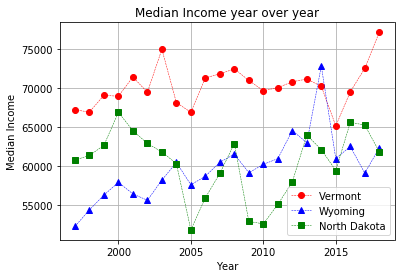

In [9]:
low_gdp_states = ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_states:
    median_income_plot = plt.plot(median_income_pivot.index, median_income_pivot[state], marker=mark, 
                                  color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Income year over year')
plt.grid()

plt.show()

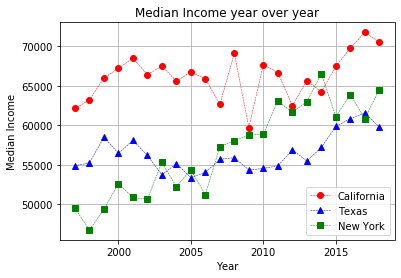

In [10]:
high_gdp_states = ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_states:
    median_income_plot = plt.plot(median_income_pivot.index, median_income_pivot[state], marker=mark, 
                                  color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Income year over year')
plt.grid()

plt.show()

In [11]:
homeowner_grouped = jack_data.groupby(["year", "GDP", "state"])["homeownership(%)"]
homeowner_mean = homeowner_grouped.mean()
homeowner_mean.head()

year  GDP    state       
1997  14724  Wyoming         67.6
      15415  Vermont         69.1
      22411  North Dakota    68.1
      24976  South Dakota    67.6
      29169  Montana         67.5
Name: homeownership(%), dtype: float64

In [12]:
homeownership = pd.DataFrame(homeowner_mean)
homeownership = homeownership.reset_index()
homeownership.head()

,year,GDP,state,homeownership(%)
0,1997,14724,Wyoming,67.6
1,1997,15415,Vermont,69.1
2,1997,22411,North Dakota,68.1
3,1997,24976,South Dakota,67.6
4,1997,29169,Montana,67.5


In [13]:
homeownership_pivot = homeownership.pivot(index = "year", columns = "state", values = "homeownership(%)")
homeownership_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,71.3,67.2,63.0,66.7,55.7,64.1,68.1,69.2,66.9,70.9,...,67.6,70.2,61.5,72.5,69.1,68.4,62.9,74.6,68.3,67.6
1998,72.9,66.3,64.3,66.7,56.0,65.2,69.3,71.0,66.9,71.2,...,67.3,71.3,62.5,73.7,69.1,69.4,64.9,74.8,70.1,70.0
1999,74.8,66.4,66.3,65.6,55.7,68.1,69.1,71.6,67.6,71.3,...,70.7,71.9,62.9,74.7,69.1,71.2,64.8,74.8,70.9,69.8
2000,73.2,66.4,68.0,68.9,57.1,68.3,70.0,72.0,68.4,69.8,...,71.2,70.9,63.8,72.7,68.7,73.9,63.6,75.9,71.8,71.0
2001,73.2,65.3,68.1,71.2,58.2,68.5,71.8,75.4,69.2,70.1,...,71.5,69.7,63.9,72.4,69.8,75.1,66.4,76.4,72.3,73.5


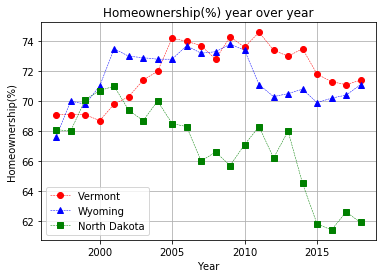

In [14]:
low_gdp_states = ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_states:
    homeownership_plot = plt.plot(homeownership_pivot.index, homeownership_pivot[state], marker=mark, 
                                  color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Homeownership(%)')
plt.title('Homeownership(%) year over year')
plt.grid()

plt.show()

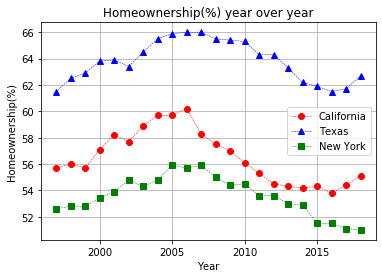

In [15]:
high_gdp_states = ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_states:
    homeownership_plot = plt.plot(homeownership_pivot.index, homeownership_pivot[state], marker=mark, 
                                  color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Homeownership(%)')
plt.title('Homeownership(%) year over year')
plt.grid()

plt.show()

In [16]:
x = jack_data["GDP"]
y = jack_data["median income"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.001318    intercept: 60047.282245


In [17]:
print("R-squared: %f" % r_value**2)

R-squared: 0.002754


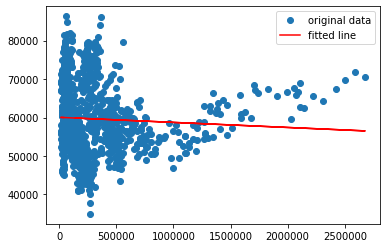

In [18]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()